In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt

In [11]:
Info= pd.read_csv('C:/Users/Msi/Desktop/CALISMALAR/DetectionFraud/cc_info.csv')
Transactions= pd.read_csv('C:/Users/Msi/Desktop/CALISMALAR/DetectionFraud/transactions.csv')

In [12]:
Info

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000
...,...,...,...,...,...
979,8938296722055540,Houston,PA,15342,36000
980,2756688131944353,Washington,NH,3280,15000
981,5783648852115715,Washington,NH,3280,20000
982,8259854075192493,Omaha,GA,31821,10000


In [13]:
Transactions

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719
...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162


In [14]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 11.2+ MB


In [15]:
Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


In [16]:
print(Transactions.isnull().sum())
print('-------------------------')
print(Info.isnull().sum())


credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64
-------------------------
credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64


In [17]:
df = Transactions.merge(Info, on = 'credit_card')

In [18]:
df

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000
...,...,...,...,...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497,Louisville,GA,30434,6000
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071,Louisville,GA,30434,6000
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983,Louisville,GA,30434,6000
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162,Louisville,GA,30434,6000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
 5   city                       294588 non-null  object 
 6   state                      294588 non-null  object 
 7   zipcode                    294588 non-null  int64  
 8   credit_card_limit          294588 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 20.2+ MB


In [20]:
features = ['transaction_dollar_amount', 'Long', 'Lat', 'credit_card_limit']

In [21]:
X = df[features]

In [22]:
print(X)

        transaction_dollar_amount       Long        Lat  credit_card_limit
0                           43.78 -80.174132  40.267370              20000
1                          103.15 -80.194240  40.180114              20000
2                           48.55 -80.211033  40.313004              20000
3                          136.18 -80.174138  40.290895              20000
4                           71.82 -80.238720  40.166719              20000
...                           ...        ...        ...                ...
294583                     127.23 -82.360952  32.978497               6000
294584                      84.90 -82.322721  33.061071               6000
294585                      77.54 -82.442130  32.949983               6000
294586                     144.05 -82.398587  32.976162               6000
294587                     154.36 -82.389680  33.068351               6000

[294588 rows x 4 columns]


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
model = IsolationForest(contamination=0.04, n_estimators=100, max_samples='auto', max_features=1.0, random_state=42)

In [25]:
model.fit(X_scaled)

IsolationForest(contamination=0.04, random_state=42)

In [26]:
anomaly_scores = model.decision_function(X_scaled)

In [27]:
df['anomaly_score'] = anomaly_scores

In [28]:
threshold = df['anomaly_score'].quantile(0.05)

In [29]:
anomalies = df[df['anomaly_score'] < threshold]

In [30]:
df['anomaly_label'] = [1 if score < 0 else 0 for score in anomaly_scores]

In [31]:
anomaly_count = df['anomaly_label'].sum()

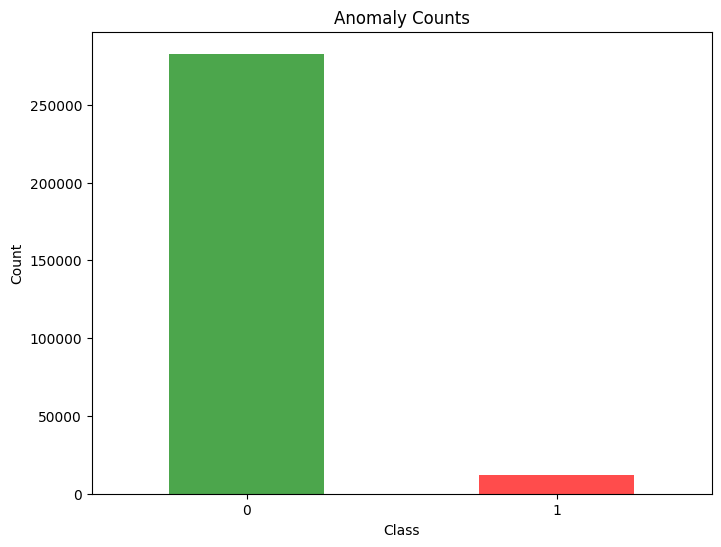

Total Anomalies: 11784


In [32]:
plt.figure(figsize=(8, 6))
df['anomaly_label'].value_counts().plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Anomaly Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
print(f'Total Anomalies: {anomaly_count}')

In [33]:
ny_coords = [40.7128, -74.0060]


In [34]:
ny_map = folium.Map(location=ny_coords, zoom_start=12) 

In [35]:
marker_cluster = MarkerCluster().add_to(ny_map)

In [36]:
ny_anomalies = df[(df['anomaly_label'] == 1) & (df['state'] == 'NY')]

In [37]:
marker_cluster = MarkerCluster().add_to(ny_map)

In [38]:
for index, row in ny_anomalies.iterrows():
    folium.Marker([row['Lat'], row['Long']], popup=f"Anomaly Score: {row['anomaly_score']} - City: {row['city']}, State: {row['state']}", icon=folium.Icon(color='red')).add_to(marker_cluster)

In [39]:
ny_map
